# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# Dr. Ryan @STEMplicity



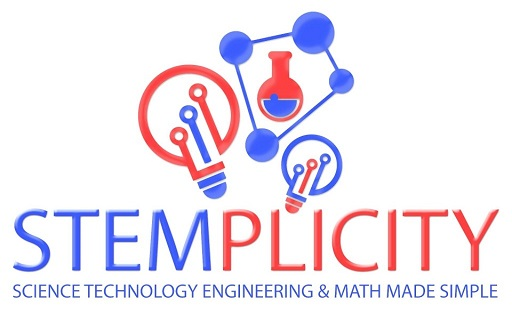

# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [42]:
# import EDA libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

# import data cleaner and standardizer libraries
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# import ML (model, improvement and evaluation) libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score

In [43]:
bank_df = pd.read_csv('Bank_Customer_retirement.csv')

In [44]:
bank_df.head() # No string data. No Encoder required

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [45]:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [46]:
bank_df.info() # No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer ID   500 non-null    int64  
 1   Age           500 non-null    float64
 2   401K Savings  500 non-null    float64
 3   Retire        500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [47]:
bank_df.describe() # No obvious outliers (a.k.a. fat-finger errors)

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [48]:
bank_df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [49]:
bank_df.shape

(500, 4)

# STEP #3: VISUALIZING THE DATA

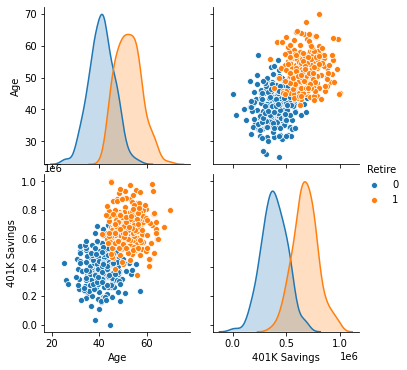

In [50]:
sns.pairplot(bank_df, hue = 'Retire', vars = ['Age', '401K Savings'])
plt.show()
# These 2 classes are easily separable by a Support Vector Machine
# This helps us visualize we can use that model

In [51]:
bank_df.Retire.value_counts()

1    250
0    250
Name: Retire, dtype: int64

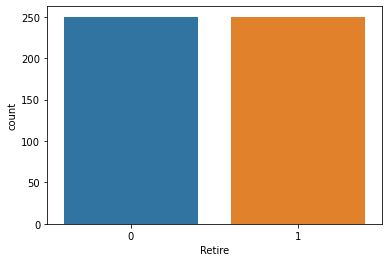

In [52]:
# PERFECT! We will not need to use RepeatedStratifiedKFold or OverSampling!!!
# Labels are perfectly balanced
sns.countplot(bank_df['Retire'], label = "Count")
plt.show()

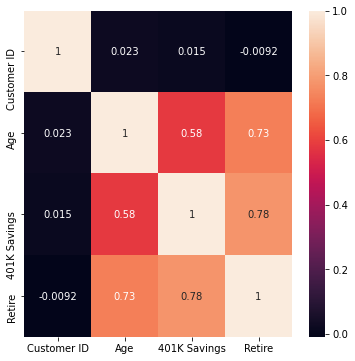

In [53]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(6,6)) 
sns.heatmap(bank_df.corr(), annot=True)
plt.show()

# STEP #4: MODEL TRAINING 

In [54]:
# Prepare the data for ML -> Drop the Customer ID column
bank_df = bank_df.drop(columns='Customer ID',axis=1)

In [55]:
bank_df.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [56]:
# Let's get X and y
X = bank_df.drop(['Retire'],axis=1)
y = bank_df['Retire']

In [57]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [58]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [59]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [60]:
# TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 2)
(400,)
(100, 2)
(100,)


In [62]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# Initiate and Fit the Model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

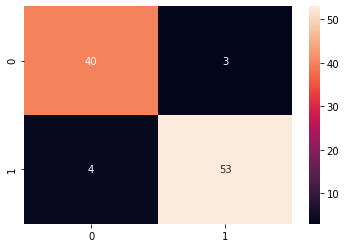

In [64]:
y_pred = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.95      0.93      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [66]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = svc_model, X = X_train, y = y_train, cv = 10) # 10-fold
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.50 %
Standard Deviation: 3.32 %


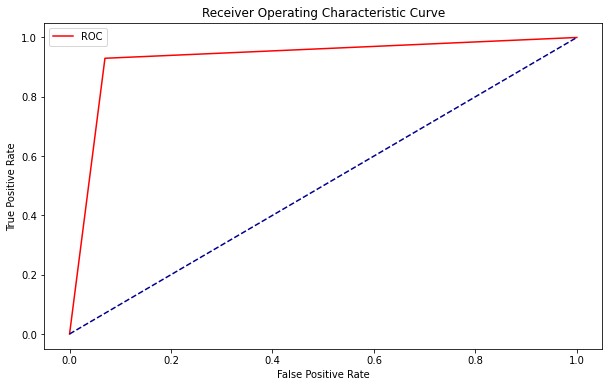

In [67]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# STEP #6: IMPROVING THE MODEL

In [68]:
# GRID SEARCH
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(svc_model,param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [69]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVC(C=0.1, gamma=0.01)

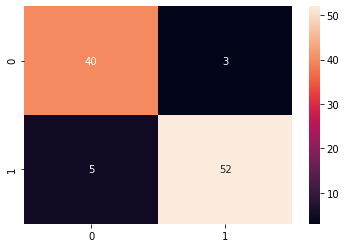

In [71]:
grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
plt.show()

In [72]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.95      0.91      0.93        57

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [73]:
# K-Fold Cross Validation
accuracies = cross_val_score(estimator = svc_model, X = X_test, y = grid_predictions, cv = 10) # 10-fold
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.00 %
Standard Deviation: 4.58 %


In [74]:
# WITHOUT GRID SEARCH
# Accuracy: 94.50 %
# Standard Deviation: 3.32 %

# WITH GRID SEARCH
# Accuracy: 97.00 %
# Standard Deviation: 4.58 %

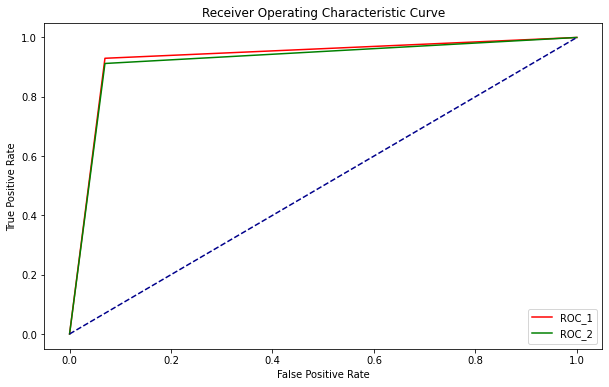

In [76]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
fpr2,tpr2,thresholds2 = roc_curve(y_test,grid_predictions)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',label='ROC_1')
plt.plot(fpr2,tpr2,color='green',label='ROC_2')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# GREAT JOB! NOW YOU ARE A SUPPORT VECTOR MACHINES PRO! KEEP UP THE GOOD WORK!